1.**Collecting Nigerian Government Securities Data:** <br>
We will use data from the Debt Management Office Nigeria for FGN Bonds, Treasury Bills, and Open Market Operations (OMO) securities. The maturities range from short-term (6 months) to long-term (20–30 years).

        Example Data (from sources➡️www.dmo.gov.ng)
        Security Type         | Maturity (Years)    | Yield (%)
        Treasury Bill       	   0.5	                   5.2
        Treasury Bill           	1	                     5.5
        OMO Bill	                2	                     6.0
        FGN Bond	                5	                     7.2
        FGN Bond	               10                         8.0
        FGN Bond	               20	                     9.5
        FGN Bond	               30	                     10.0

**2. Yield Curve Modeling**

Fitting the Nelson-Siegel Model
The Nelson-Siegel model is defined as:

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Real Nigerian data (from sources: ➡️www.dmo.gov.ng)
maturities = np.array([0.5, 1, 2, 5, 10, 20, 30])
yields = np.array([5.2, 5.5, 6.0, 7.2, 8.0, 9.5, 10.0])  # Example rates

# Nelson-Siegel function
def nelson_siegel(t, beta0, beta1, beta2, tau):
    return beta0 + beta1 * ((1 - np.exp(-t/tau)) / (t/tau)) + beta2 * (((1 - np.exp(-t/tau)) / (t/tau)) - np.exp(-t/tau))

# Fit the model
params, _ = curve_fit(nelson_siegel, maturities, yields, p0=[5, -1, 1, 2])
beta0, beta1, beta2, tau = params

print(f"Estimated Parameters: Beta0={beta0}, Beta1={beta1}, Beta2={beta2}, Tau={tau}")

Estimated Parameters: Beta0=11.222265532076278, Beta1=-6.203636667585154, Beta2=2.983015149936622e-05, Tau=5.967641975767709


**3. Fitting a Cubic-Spline Model**<br>
A Cubic-Spline model provides a more flexible fit:

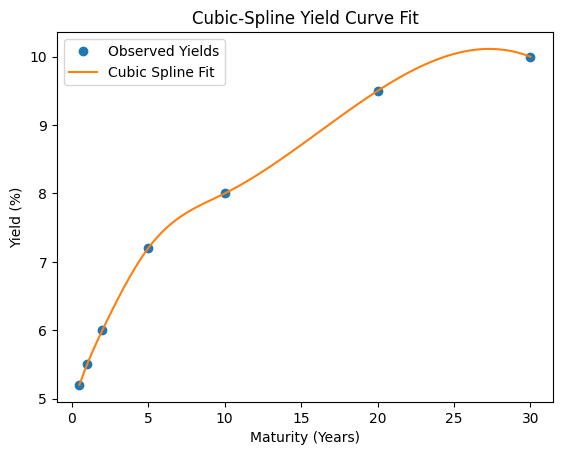

In [ ]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Fit cubic spline
spline = CubicSpline(maturities, yields)

# Plot results
x_vals = np.linspace(0.5, 30, 100)
plt.plot(maturities, yields, 'o', label="Observed Yields")
plt.plot(x_vals, spline(x_vals), label="Cubic Spline Fit")
plt.legend()
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield (%)")
plt.title("Cubic-Spline Yield Curve Fit")
plt.show()